In [1]:
from util import *

ModuleNotFoundError: No module named 'util'

In [2]:
cohort07_query = """WITH
T0 AS (
    SELECT * FROM CINS_REACTIVATED_CUST_STT_CHG_01072023),
T1 AS (
    SELECT * FROM CINS_REACTIVATED_SCORE_01072023),
T2 AS (
    SELECT *
        FROM (SELECT T0.*, T1.SCORE
        FROM T0 INNER JOIN T1 ON T0.CUSTOMER_CDE = T1.CUSTOMER_CDE
        WHERE REACTIVATED IS NOT NULL
        AND CUST_STT_LAG <= 1
        ORDER BY SCORE DESC)
    WHERE ROWNUM <= 500000),
T3 AS (
    SELECT *
    FROM DW_ANALYTICS.DW_CUST_PRODUCT_LOC_FCT),
T4 AS (
    SELECT T2.CUSTOMER_CDE, T3.PROCESS_DT AS RPT_DT,
        MAX(CASE
            WHEN T3.CUST_STATUS = 'HOAT DONG' THEN 2
            WHEN T3.CUST_STATUS = 'NGU DONG' THEN 1
            WHEN T3.CUST_STATUS = 'DONG BANG' THEN 0
        END) AS CUST_STT
    FROM T2 INNER JOIN T3 ON T2.CUSTOMER_CDE = T3.CUSTOMER_CDE
    WHERE PROCESS_DT = TO_DATE('31-12-2022', 'DD-MM-YY')
    OR PROCESS_DT = TO_DATE('31-01-2023', 'DD-MM-YY')
    OR PROCESS_DT = TO_DATE('28-02-2023', 'DD-MM-YY')
    OR PROCESS_DT = TO_DATE('31-03-2023', 'DD-MM-YY')
    OR PROCESS_DT = TO_DATE('30-04-2023', 'DD-MM-YY')
    OR PROCESS_DT = TO_DATE('31-05-2023', 'DD-MM-YY')
    OR PROCESS_DT = TO_DATE('30-06-2023', 'DD-MM-YY')
    OR PROCESS_DT = TO_DATE('31-07-2023', 'DD-MM-YY')
    OR PROCESS_DT = TO_DATE('31-08-2023', 'DD-MM-YY')
    OR PROCESS_DT = TO_DATE('30-09-2023', 'DD-MM-YY')
    OR PROCESS_DT = TO_DATE('31-10-2023', 'DD-MM-YY')
    OR PROCESS_DT = TO_DATE('30-11-2023', 'DD-MM-YY')
    OR PROCESS_DT = TO_DATE('31-12-2023', 'DD-MM-YY')
    GROUP BY T2.CUSTOMER_CDE, T3.PROCESS_DT),
T5 AS (
    SELECT CUSTOMER_CDE, 
    -- RPT_DT
    LAG(RPT_DT, 9) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LAG9,
    LAG(RPT_DT, 8) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LAG8,
    LAG(RPT_DT, 7) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LAG7,
    LAG(RPT_DT, 6) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LAG6,
    LAG(RPT_DT, 5) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LAG5,
    LAG(RPT_DT, 4) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LAG4,
    LAG(RPT_DT, 3) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LAG3,
    LAG(RPT_DT, 2) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LAG2,
    LAG(RPT_DT, 1) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LAG1,
    RPT_DT, 
    LEAD(RPT_DT, 1) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LEAD1, 
    LEAD(RPT_DT, 2) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LEAD2,
    LEAD(RPT_DT, 3) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LEAD3,
    LEAD(RPT_DT, 4) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LEAD4,
    LEAD(RPT_DT, 5) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LEAD5,
    LEAD(RPT_DT, 6) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LEAD6,
    LEAD(RPT_DT, 7) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LEAD7,
    LEAD(RPT_DT, 8) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LEAD8,
    LEAD(RPT_DT, 9) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LEAD9,
    -- STATUS
    LAG(CUST_STT, 9) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LAG9,
    LAG(CUST_STT, 8) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LAG8,
    LAG(CUST_STT, 7) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LAG7,
    LAG(CUST_STT, 6) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LAG6,
    LAG(CUST_STT, 5) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LAG5,
    LAG(CUST_STT, 4) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LAG4,
    LAG(CUST_STT, 3) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LAG3,
    LAG(CUST_STT, 2) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LAG2,
    LAG(CUST_STT, 1) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LAG1,
    CUST_STT, 
    LEAD(CUST_STT, 1) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LEAD1,
    LEAD(CUST_STT, 2) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LEAD2,
    LEAD(CUST_STT, 3) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LEAD3,
    LEAD(CUST_STT, 4) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LEAD4,
    LEAD(CUST_STT, 5) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LEAD5,
    LEAD(CUST_STT, 6) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LEAD6,
    LEAD(CUST_STT, 7) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LEAD7,
    LEAD(CUST_STT, 8) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LEAD8,
    LEAD(CUST_STT, 9) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LEAD9
    FROM T4
),
T6 AS (
    SELECT * FROM T5
    WHERE RPT_DT = TO_DATE('30-06-2023', 'DD-MM-YY')),
T7 AS (
    SELECT T6.*, T2.SCORE
    FROM T6
    INNER JOIN T2 ON T6.CUSTOMER_CDE = T2.CUSTOMER_CDE
    ORDER BY T2.SCORE DESC
)
SELECT * 
FROM T7"""

In [3]:
cohort07 = download_or_reload('data/COHORT_07', cohort07_query)

Len 500000


In [4]:
cohort07.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 40 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   CUSTOMER_CDE    500000 non-null  object        
 1   RPT_DT_LAG9     0 non-null       object        
 2   RPT_DT_LAG8     0 non-null       object        
 3   RPT_DT_LAG7     0 non-null       object        
 4   RPT_DT_LAG6     424340 non-null  datetime64[ns]
 5   RPT_DT_LAG5     430473 non-null  datetime64[ns]
 6   RPT_DT_LAG4     439606 non-null  datetime64[ns]
 7   RPT_DT_LAG3     455406 non-null  datetime64[ns]
 8   RPT_DT_LAG2     469928 non-null  datetime64[ns]
 9   RPT_DT_LAG1     497959 non-null  datetime64[ns]
 10  RPT_DT          500000 non-null  datetime64[ns]
 11  RPT_DT_LEAD1    499894 non-null  datetime64[ns]
 12  RPT_DT_LEAD2    499751 non-null  datetime64[ns]
 13  RPT_DT_LEAD3    499641 non-null  datetime64[ns]
 14  RPT_DT_LEAD4    499521 non-null  dat

In [5]:
cohort07

,CUSTOMER_CDE,RPT_DT_LAG9,RPT_DT_LAG8,RPT_DT_LAG7,RPT_DT_LAG6,RPT_DT_LAG5,RPT_DT_LAG4,RPT_DT_LAG3,RPT_DT_LAG2,RPT_DT_LAG1,...,CUST_STT_LEAD1,CUST_STT_LEAD2,CUST_STT_LEAD3,CUST_STT_LEAD4,CUST_STT_LEAD5,CUST_STT_LEAD6,CUST_STT_LEAD7,CUST_STT_LEAD8,CUST_STT_LEAD9,SCORE
0,18138008,None,None,None,NaT,NaT,NaT,NaT,NaT,NaT,...,2.0,2.0,2.0,2.0,2.0,2.0,None,None,None,1.000000
1,18128220,None,None,None,NaT,NaT,NaT,NaT,NaT,2023-05-31,...,2.0,2.0,2.0,2.0,2.0,2.0,None,None,None,1.000000
2,18099696,None,None,None,NaT,NaT,NaT,NaT,NaT,2023-05-31,...,2.0,2.0,2.0,2.0,2.0,2.0,None,None,None,1.000000
3,18111982,None,None,None,NaT,NaT,NaT,NaT,NaT,2023-05-31,...,2.0,2.0,2.0,2.0,2.0,2.0,None,None,None,1.000000
4,18114769,None,None,None,NaT,NaT,NaT,NaT,NaT,2023-05-31,...,2.0,2.0,2.0,2.0,2.0,2.0,None,None,None,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,15721190,None,None,None,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,...,0.0,0.0,0.0,0.0,0.0,0.0,None,None,None,0.001124
499996,15721962,None,None,None,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,...,0.0,0.0,0.0,0.0,0.0,0.0,None,None,None,0.001124
499997,15722071,None,None,None,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,...,0.0,0.0,0.0,0.0,0.0,0.0,None,None,None,0.001124
499998,15723000,None,None,None,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,...,0.0,0.0,0.0,0.0,0.0,0.0,None,None,None,0.001124


In [10]:
def analyze_cohort(cohort):
    len_cohort = len(cohort)
    data = []
    num_react = len(cohort[cohort['CUST_STT'] == 2])
    rpt_dt = cohort['RPT_DT'].tolist()[0]
    cohort = cohort[cohort['CUST_STT'] != 2]
    len_not_react = len(cohort)
    data.append((rpt_dt,num_react, len_not_react))
    if len(cohort) > 0:
        for i in range(1,10):
            if len(cohort) > 0:
                lead_mth = f'CUST_STT_LEAD{i}'
                num_react = len(cohort[cohort[lead_mth] == 2])
                rpt_dt = cohort[f'RPT_DT_LEAD{i}'].tolist()[0]
                cohort = cohort[cohort[lead_mth] != 2]
                len_not_react = len(cohort)
                data.append((rpt_dt,num_react, len_not_react))
    res_df = pd.DataFrame(data=data, columns=['RPT_DT', 'NUM_REACT', 'NUM_NOT_REACT'])
    res_df['PERC_REACT_PREV_MOB'] = res_df['NUM_REACT'].shift(-1) / res_df['NUM_NOT_REACT']
    res_df['PERC_REACT_PREV_MOB'] = res_df['PERC_REACT_PREV_MOB'].shift()
    res_df['CUMSUM'] = res_df['NUM_REACT'].cumsum()
    res_df['PERC'] = res_df['CUMSUM'] / len_cohort
    res_df = res_df[res_df['RPT_DT'].notnull()]
    ax = sns.barplot(res_df, x='RPT_DT', y='NUM_REACT')
    sns.lineplot(res_df['CUMSUM'], ax=ax)
    plt.show()
    return res_df

10000


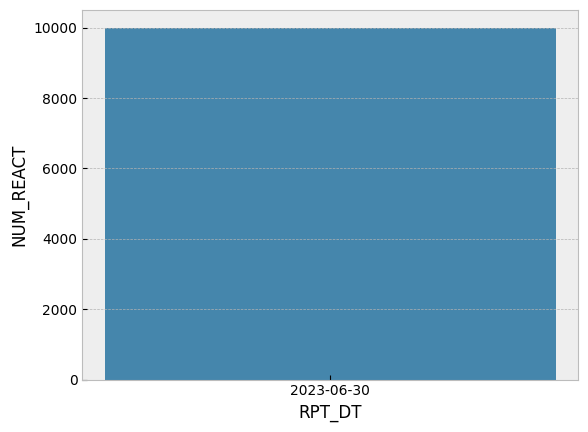

,RPT_DT,NUM_REACT,NUM_NOT_REACT,PERC_REACT_PREV_MOB,CUMSUM,PERC
0,2023-06-30,10000,0,NaN,10000,1.0


50000


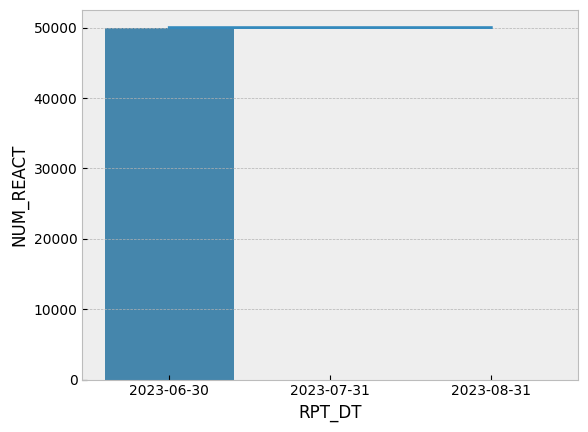

,RPT_DT,NUM_REACT,NUM_NOT_REACT,PERC_REACT_PREV_MOB,CUMSUM,PERC
0,2023-06-30,49999,1,NaN,49999,0.99998
1,2023-07-31,0,1,0.0,49999,0.99998
2,2023-08-31,1,0,1.0,50000,1.00000


100000


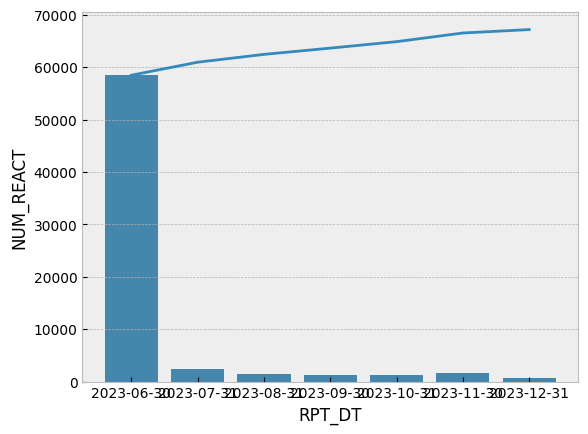

,RPT_DT,NUM_REACT,NUM_NOT_REACT,PERC_REACT_PREV_MOB,CUMSUM,PERC
0,2023-06-30,58490,41510,NaN,58490,0.58490
1,2023-07-31,2478,39032,0.059696,60968,0.60968
2,2023-08-31,1497,37535,0.038353,62465,0.62465
3,2023-09-30,1193,36342,0.031784,63658,0.63658
4,2023-10-31,1238,35104,0.034065,64896,0.64896
5,2023-11-30,1651,33453,0.047032,66547,0.66547
6,2023-12-31,651,32802,0.019460,67198,0.67198


200000


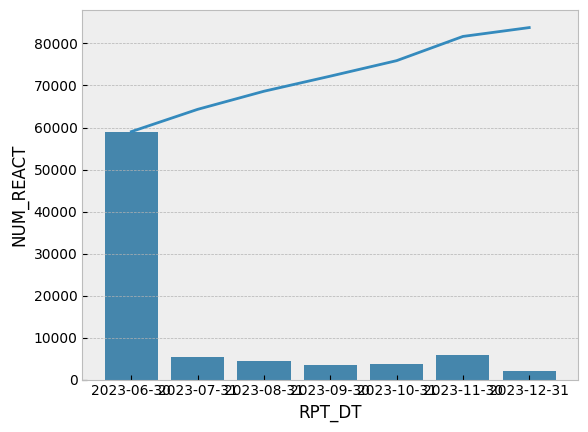

,RPT_DT,NUM_REACT,NUM_NOT_REACT,PERC_REACT_PREV_MOB,CUMSUM,PERC
0,2023-06-30,59020,140980,NaN,59020,0.295100
1,2023-07-31,5305,135675,0.037629,64325,0.321625
2,2023-08-31,4307,131368,0.031745,68632,0.343160
3,2023-09-30,3590,127778,0.027328,72222,0.361110
4,2023-10-31,3688,124090,0.028863,75910,0.379550
5,2023-11-30,5767,118323,0.046474,81677,0.408385
6,2023-12-31,2107,116216,0.017807,83784,0.418920


300000


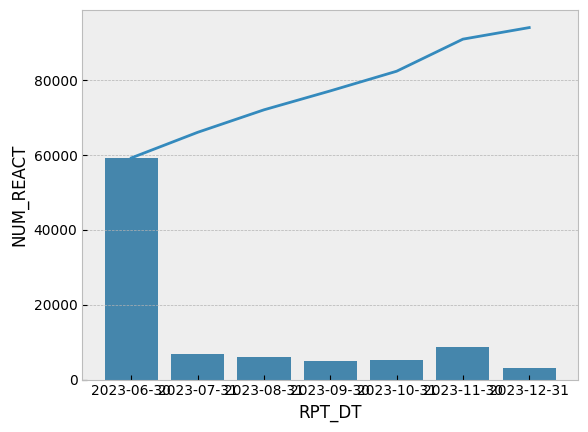

,RPT_DT,NUM_REACT,NUM_NOT_REACT,PERC_REACT_PREV_MOB,CUMSUM,PERC
0,2023-06-30,59242,240758,NaN,59242,0.197473
1,2023-07-31,6839,233919,0.028406,66081,0.220270
2,2023-08-31,6011,227908,0.025697,72092,0.240307
3,2023-09-30,5054,222854,0.022176,77146,0.257153
4,2023-10-31,5255,217599,0.023580,82401,0.274670
5,2023-11-30,8577,209022,0.039417,90978,0.303260
6,2023-12-31,3090,205932,0.014783,94068,0.313560


500000


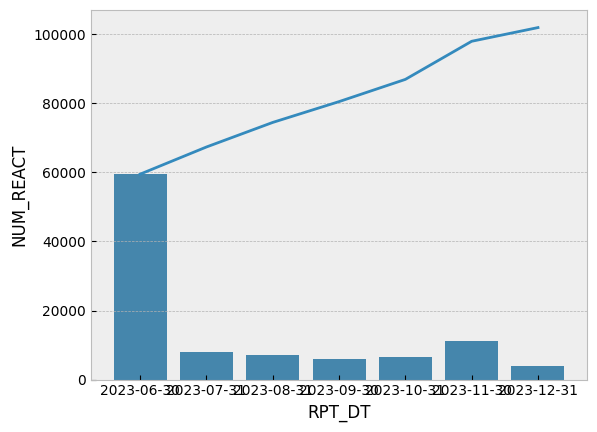

,RPT_DT,NUM_REACT,NUM_NOT_REACT,PERC_REACT_PREV_MOB,CUMSUM,PERC
0,2023-06-30,59507,440493,NaN,59507,0.119014
1,2023-07-31,7868,432625,0.017862,67375,0.134750
2,2023-08-31,7117,425508,0.016451,74492,0.148984
3,2023-09-30,6029,419479,0.014169,80521,0.161042
4,2023-10-31,6438,413041,0.015348,86959,0.173918
5,2023-11-30,11040,402001,0.026729,97999,0.195998
6,2023-12-31,3968,398033,0.009871,101967,0.203934


In [11]:
for limit in [10000, 50000, 100000, 200000, 300000, 500000]:
    print(limit)
    res_df = analyze_cohort(cohort07[:limit])
    display(res_df)

# Analyse Product 

In [1]:
prod_query = """WITH
T0 AS (
    SELECT * FROM CINS_REACTIVATED_CUST_STT_CHG_01072023),
T1 AS (
    SELECT * FROM CINS_REACTIVATED_SCORE_01072023),
T2 AS (
    SELECT *
        FROM (SELECT T0.*, T1.SCORE
        FROM T0 INNER JOIN T1 ON T0.CUSTOMER_CDE = T1.CUSTOMER_CDE
        WHERE REACTIVATED IS NOT NULL
        AND CUST_STT_LAG <= 1
        ORDER BY SCORE DESC)
    WHERE ROWNUM <= 500000),
T3 AS (
    SELECT T2.CUSTOMER_CDE, T2.RPT_DT, TA.CUST_STATUS, T2.REACTIVATED, T2.SCORE, 
    TA.BH, TA.IB, TA.MB, TA.PAY, TA.TKTT, TA.TK, TA.VAY, TA.SP_KHAC, TA.CREDIT, TA.PREPAID,
    TA.SD_BH, TA.SD_IB, TA.SD_MB, TA.SD_PAY, TA.SD_TKTT, TA.SD_TK, TA.SD_VAY, TA.SD_SP_KHAC, TA.SD_CREDIT, TA.SD_PREPAID, 
    TA.LASTEST_TRANS_DT
    FROM T2 INNER JOIN DW_ANALYTICS.DW_CUST_PRODUCT_LOC_FCT TA 
    ON T2.CUSTOMER_CDE = TA.CUSTOMER_CDE AND T2.RPT_DT = TA.PROCESS_DT
    )
SELECT * FROM T3
ORDER BY SCORE DESC"""

In [4]:
prod_df = download_or_reload('data/PRODUCT_REACTIVE_07', prod_query)

Len 563671


In [5]:
prod_df

,CUSTOMER_CDE,RPT_DT,CUST_STATUS,REACTIVATED,SCORE,BH,IB,MB,PAY,TKTT,...,SD_IB,SD_MB,SD_PAY,SD_TKTT,SD_TK,SD_VAY,SD_SP_KHAC,SD_CREDIT,SD_PREPAID,LASTEST_TRANS_DT
0,18099696,2023-06-30,HOAT DONG,1,1.000000,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2023-06-17
1,18099696,2023-06-30,HOAT DONG,1,1.000000,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-06-17
2,18114769,2023-06-30,HOAT DONG,1,1.000000,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2023-06-15
3,18128220,2023-06-30,HOAT DONG,1,1.000000,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-06-23
4,18111982,2023-06-30,HOAT DONG,1,1.000000,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2023-06-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563666,15628077,2023-06-30,DONG BANG,0,0.001124,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
563667,15395487,2023-06-30,DONG BANG,0,0.001124,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
563668,15391389,2023-06-30,DONG BANG,0,0.001124,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
563669,15448778,2023-06-30,DONG BANG,0,0.001124,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [6]:
prod_df['CUST_STATUS'].value_counts()

DONG BANG    321349
NGU DONG     178905
HOAT DONG     63417
Name: CUST_STATUS, dtype: int64

In [7]:
prod_df[prod_df['CUST_STATUS']=='HOAT DONG'][['BH', 'IB', 'MB', 'PAY', 'TKTT', 'TK', 'VAY', 'SP_KHAC', 'CREDIT', 'PREPAID']]

,BH,IB,MB,PAY,TKTT,TK,VAY,SP_KHAC,CREDIT,PREPAID
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
560349,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
560774,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
561333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
561932,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [8]:
active_df = prod_df[prod_df['CUST_STATUS']=='HOAT DONG']

In [12]:
prod_active_df = active_df[['BH', 'IB', 'MB', 'PAY', 'TKTT', 'TK', 'VAY', 'SP_KHAC', 'CREDIT', 'PREPAID']]
prod_active_df.sum(axis=0)

BH           419.0
IB            33.0
MB          2224.0
PAY        12512.0
TKTT       52668.0
TK          1050.0
VAY          945.0
SP_KHAC    11548.0
CREDIT      7791.0
PREPAID      599.0
dtype: float64

In [16]:
prod_active_df.sum(axis=0) / prod_active_df.sum(axis=0).sum() * 100

BH          0.466650
IB          0.036753
MB          2.476918
PAY        13.934892
TKTT       58.657519
TK          1.169408
VAY         1.052467
SP_KHAC    12.861264
CREDIT      8.677009
PREPAID     0.667120
dtype: float64